In [117]:
import pandas as pd
import pickle
import numpy as np
import time
from datetime import datetime
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [118]:
with open("subscribers","rb") as file_handle:
    retrieved_data = pickle.load(file_handle)
    #print(retrieved_data)
retrieved_data.to_csv('subscribers.csv')

In [119]:
with open("engagement","rb") as file_handle:
    retrieved_data = pickle.load(file_handle)
    #print(retrieved_data)
#retrieved_data.to_csv('engagement.csv')

In [120]:
with open("customer_service_reps","rb") as file_handle:
    retrieved_data = pickle.load(file_handle)
    #print(retrieved_data)
retrieved_data.to_csv('customer_service_reps.csv')

In [121]:
sub = pd.read_csv('subscribers.csv')
sub.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,...,NaN,True,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,...,0.0,False,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN
2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,...,1.0,False,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,...,0.0,False,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN
4,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,...,9.0,False,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN


# segmentation and targeting

In [122]:
df  = pd.DataFrame()
d = pd.DataFrame()

In [123]:
for i in sub.columns[1:11]:
    d[i] = sub[i]

In [124]:
#df.index = list(sub['subid'])

In [125]:
d = d.drop(columns=["num_ideal_streaming_services","num_weekly_services_utilized","retarget_TF"])
d['op_sys'] = sub["op_sys"]
d

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys
0,21724479,economy,comedy,access to exclusive content,NaN,NaN,False,Android
1,23383224,base,comedy,access to exclusive content,22.951579,70.0,False,NaN
2,26844789,enhanced,regional,replace OTT,36.001186,25.0,True,iOS
3,29417030,base,drama,replace OTT,20.051667,30.0,False,Android
4,26723159,base,comedy,replace OTT,22.951579,28.0,False,iOS
...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,comedy,supplement OTT,28.751405,38.0,False,iOS
227624,25843074,enhanced,comedy,replace OTT,27.301448,49.0,False,iOS
227625,24799085,base,comedy,access to exclusive content,31.651317,45.0,False,iOS
227626,21308040,base,comedy,access to exclusive content,NaN,NaN,False,iOS


In [126]:
d = d.fillna(999)
df1 = d[d['age']<=80]
df2 = d[d['age']<=10]
df3 = d[d['age']==999]
df = pd.concat([df1,df3])
df = df.drop(df2.index)
df = df[df['male_TF']!=999]
df = df[df['weekly_consumption_hour']>0]
df = df.reset_index()



In [127]:
for i in df.index:
    #print(df.iloc[[i],[6]])
    hour = df['weekly_consumption_hour'][i]
    r = [10,20,30,40,50,60,70,80]

    for j in r:
        if (j-10)<hour and hour<=j and hour!=0:
            df.loc[[i],['weekly_consumption_hour']] = str(j-10)+'-'+str(j)
            continue
  
        

    
    

In [128]:
for i in df.index:
    #print(df.iloc[[i],[6]])

    age = df['age'][i]
    r = [10,20,30,40,50,60,70,80]

    
    for j in r:
        if (j-10)<age and age<=j and age!=0:
            df.loc[[i],['age']] = str(j-10)+'-'+str(j)
            continue
  

In [129]:
df

,index,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys
0,1,23383224,base,comedy,access to exclusive content,20-30,60-70,False,999
1,2,26844789,enhanced,regional,replace OTT,30-40,20-30,True,iOS
2,3,29417030,base,drama,replace OTT,20-30,20-30,False,Android
3,4,26723159,base,comedy,replace OTT,20-30,20-30,False,iOS
4,5,24810928,base,comedy,access to exclusive content,20-30,60-70,False,999
...,...,...,...,...,...,...,...,...,...
225974,227609,22532282,base,comedy,replace OTT,999.0,999.0,False,iOS
225975,227611,26891485,enhanced,comedy,replace OTT,999.0,999.0,False,iOS
225976,227617,28920930,enhanced,regional,replace OTT,999.0,999.0,False,iOS
225977,227620,21928274,base,drama,replace OTT,999.0,999.0,False,Android


In [130]:
df

,index,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys
0,1,23383224,base,comedy,access to exclusive content,20-30,60-70,False,999
1,2,26844789,enhanced,regional,replace OTT,30-40,20-30,True,iOS
2,3,29417030,base,drama,replace OTT,20-30,20-30,False,Android
3,4,26723159,base,comedy,replace OTT,20-30,20-30,False,iOS
4,5,24810928,base,comedy,access to exclusive content,20-30,60-70,False,999
...,...,...,...,...,...,...,...,...,...
225974,227609,22532282,base,comedy,replace OTT,999.0,999.0,False,iOS
225975,227611,26891485,enhanced,comedy,replace OTT,999.0,999.0,False,iOS
225976,227617,28920930,enhanced,regional,replace OTT,999.0,999.0,False,iOS
225977,227620,21928274,base,drama,replace OTT,999.0,999.0,False,Android


In [131]:
df = df.reset_index()
df

,level_0,index,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys
0,0,1,23383224,base,comedy,access to exclusive content,20-30,60-70,False,999
1,1,2,26844789,enhanced,regional,replace OTT,30-40,20-30,True,iOS
2,2,3,29417030,base,drama,replace OTT,20-30,20-30,False,Android
3,3,4,26723159,base,comedy,replace OTT,20-30,20-30,False,iOS
4,4,5,24810928,base,comedy,access to exclusive content,20-30,60-70,False,999
...,...,...,...,...,...,...,...,...,...,...
225974,225974,227609,22532282,base,comedy,replace OTT,999.0,999.0,False,iOS
225975,225975,227611,26891485,enhanced,comedy,replace OTT,999.0,999.0,False,iOS
225976,225976,227617,28920930,enhanced,regional,replace OTT,999.0,999.0,False,iOS
225977,225977,227620,21928274,base,drama,replace OTT,999.0,999.0,False,Android


In [132]:
get_dummy = pd.get_dummies(df.drop(columns=["subid",'index',"level_0"]))
get_dummy

,package_type_999,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_999,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,age_30-40,age_40-50,age_50-60,age_60-70,age_70-80,male_TF_False,male_TF_True,op_sys_999,op_sys_Android,op_sys_iOS
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225974,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
225975,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
225976,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
225977,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [133]:
#get_dummy = pd.concat([get_dummy.drop('weekly_consumption_hour', axis=1), pd.get_dummies(get_dummy['weekly_consumption_hour']).rename(columns=lambda x: 'hour_' + str(x))], axis=1)
#get_dummy = pd.concat([get_dummy.drop('age', axis=1), pd.get_dummies(get_dummy['age'])], axis=1)



In [154]:
get_dummy.columns

Index(['package_type_999', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_999',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_999',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'weekly_consumption_hour_999.0', 'weekly_consumption_hour_0-10',
       'weekly_consumption_hour_10-20', 'weekly_consumption_hour_20-30',
       'weekly_consumption_hour_30-40', 'weekly_consumption_hour_40-50',
       'weekly_consumption_hour_50-60', 'weekly_consumption_hour_60-70',
       'weekly_consumption_hour_70-80', 'age_999.0', 'age_10-20', 'age_20-30',
       'age_30-40', 'age_40-50', 'age_50-60', 'age_60-70', 'age

In [156]:
get_dummy =  get_dummy.drop(columns=['package_type_999','preferred_genre_999','op_sys_999','age_999.0','weekly_consumption_hour_999.0'])


In [161]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(get_dummy)
    distortions.append(kmeanModel.inertia_)

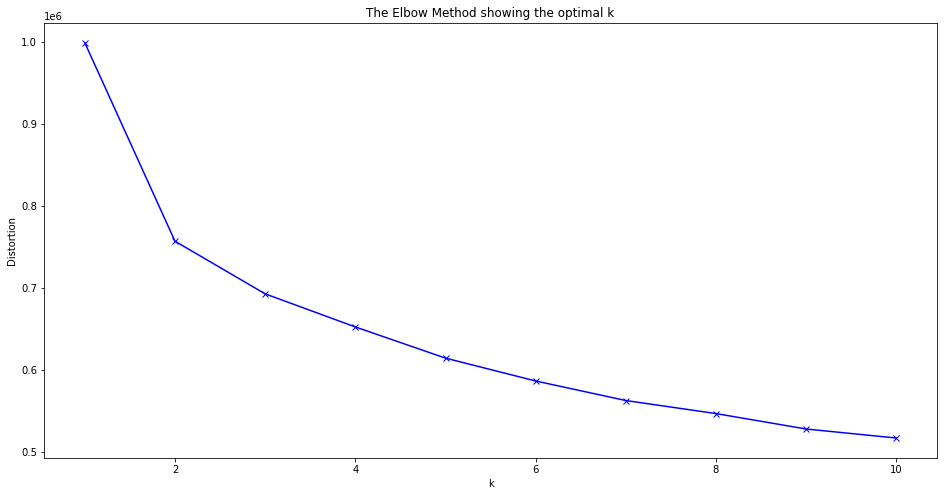

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [138]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(get_dummy)

KMeans(n_clusters=3)

In [139]:
y_km = kmeanModel.fit_predict(get_dummy)

In [140]:
y_km

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [141]:
clus = pd.DataFrame(y_km)
clus

,0
0,2
1,0
2,2
3,2
4,2
...,...
225974,0
225975,0
225976,0
225977,0


In [142]:
get_dummy['cluster'] = clus[0]
get_dummy

,package_type_999,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_999,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,age_40-50,age_50-60,age_60-70,age_70-80,male_TF_False,male_TF_True,op_sys_999,op_sys_Android,op_sys_iOS,cluster
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,2
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,2
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225974,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
225975,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
225976,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
225977,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [143]:
clus1 = get_dummy[get_dummy['cluster']==0]
clus2 = get_dummy[get_dummy['cluster']==1]
clus3 = get_dummy[get_dummy['cluster']==2]

In [144]:
get_dummy

,package_type_999,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_999,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,age_40-50,age_50-60,age_60-70,age_70-80,male_TF_False,male_TF_True,op_sys_999,op_sys_Android,op_sys_iOS,cluster
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,2
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,2
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225974,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
225975,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
225976,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
225977,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [145]:
get_dummy.to_csv("dummy.csv")

# Attribution & Allocation

In [167]:
sub = pd.read_csv('subscribers.csv')
sub.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,...,NaN,True,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,...,0.0,False,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN
2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,...,1.0,False,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,...,0.0,False,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN
4,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,...,9.0,False,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN


In [168]:
spend = pd.read_excel('advertising_spend_data.xlsx')
#print(spend.head())
spend = spend.drop([0])
#print(spend[0:1])
#print(spend.iloc([1],["Unnamed: 1"]))
chann = pd.DataFrame()
ind = []
for i in spend[0:1]:
    #print(i)
    col=spend.loc[1,i]
    spend.rename(columns = {i:col},inplace = True)
    ind.append(col)
spend = spend.drop([1])
spend = spend.groupby("date").agg('sum')
date_list = spend.index
n = []

spend





,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
date,,,,,,,,
2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
2020-02-29,49700,76600,30100,21700,15000,300,6400,6500


In [169]:
d= pd.DataFrame()
d['date'] = sub['account_creation_date']
for i in d['date']:
    #print(i)
    q = pd.Timestamp(i)
    #print(type(q))



In [170]:
convert = pd.DataFrame()
convert["date"] = sub['account_creation_date']
#convert['TOUCH1'] = sub['attribution_survey']
convert['TOUCH2'] = sub['attribution_technical']
convert['price'] = sub['discount_price']
#convert['payment_period'] = sub['payment_period']
#convert =convert[convert["payment_period"]!=0]
convert

,date,TOUCH2,price
0,2020-01-24 21:44:16,facebook,4.5141
1,2020-03-01 15:44:35,facebook,4.5141
2,2019-12-07 16:37:06,organic,4.5141
3,2020-01-27 16:09:32,search,4.5141
4,2019-10-05 12:57:07,discovery,4.5141
...,...,...,...
227623,2019-11-17 14:12:33,facebook,4.5141
227624,2019-12-06 18:02:13,google_organic,4.5141
227625,2019-12-21 19:40:44,facebook,4.5141
227626,2020-01-17 23:58:51,facebook,4.5141


In [173]:
d1 =convert[convert["TOUCH2"]=='facebook'] 
d2 =convert[convert["TOUCH2"]=='email'] 
d3 =convert[convert["TOUCH2"]=='search'] 
d4 =convert[convert["TOUCH2"]=='brand sem intent google'] 
d5 =convert[convert["TOUCH2"]=='affiliate'] 
d6 =convert[convert["TOUCH2"]=='email_blast'] 
d7 =convert[convert["TOUCH2"]=='pinterest'] 
d8 =convert[convert["TOUCH2"]=='referral'] 

frame2 = [d1,d2,d3,d4,d5,d6,d7,d8]

In [174]:
result2 = pd.concat(frame2)

In [175]:
result2 = result2.reset_index()

In [176]:
#result2
r = 0
for i in result2['date']:
    #print(i)
    result2.iloc[[r],[1]] = i[:7]
    #print(result2)
    r+=1
    #print(result2)

In [177]:
result2

,index,date,TOUCH2,price
0,0,2020-01,facebook,4.5141
1,1,2020-03,facebook,4.5141
2,8,2020-02,facebook,4.5141
3,13,2019-08,facebook,4.5141
4,15,2020-03,facebook,4.5141
...,...,...,...,...
178172,227476,2019-09,referral,4.5141
178173,227488,2019-07,referral,4.5141
178174,227498,2019-10,referral,4.5141
178175,227588,2019-11,referral,4.5141


In [178]:
result2.to_csv("result2.csv")

# last interaction

In [179]:
#CAC
a = [ '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02','2020-03']
spend.index = a
l_inter = result2.groupby(['date','TOUCH2']).size()
l_inter = l_inter.to_dict() 
inter = pd.DataFrame()
inter['des'] = l_inter.keys()
inter['count'] = l_inter.values()
#inter = inter.groupby('des').agg('sum')
#print(inter)
s = []
sp = spend.to_dict() 
#print(sp)
for i in inter['des']:
    #print(i)
    s.append(sp[i[-1]][i[0]])
inter["spending"] = s
inter
 
 
     

,des,count,spending
0,"(2019-06, affiliate)",78,11900
1,"(2019-06, brand sem intent google)",197,21400
2,"(2019-06, email)",309,75000
3,"(2019-06, email_blast)",109,10500
4,"(2019-06, facebook)",1318,84800
...,...,...,...
75,"(2020-03, email_blast)",56,300
76,"(2020-03, facebook)",6889,49100
77,"(2020-03, pinterest)",455,5900
78,"(2020-03, referral)",568,10000


In [180]:
#l_inter = result2.groupby("TOUCH2").agg('count')
inter['CAC'] = inter['spending']/inter['count']


In [181]:
#CLV

In [182]:
result2

,index,date,TOUCH2,price
0,0,2020-01,facebook,4.5141
1,1,2020-03,facebook,4.5141
2,8,2020-02,facebook,4.5141
3,13,2019-08,facebook,4.5141
4,15,2020-03,facebook,4.5141
...,...,...,...,...
178172,227476,2019-09,referral,4.5141
178173,227488,2019-07,referral,4.5141
178174,227498,2019-10,referral,4.5141
178175,227588,2019-11,referral,4.5141


In [183]:
revenue = result2.groupby(['date',"TOUCH2"]).agg('sum')

In [184]:
re = revenue.to_dict()
re

{'index': {('2019-06', 'affiliate'): 9423677,
  ('2019-06', 'brand sem intent google'): 22716942,
  ('2019-06', 'email'): 34404294,
  ('2019-06', 'email_blast'): 12747798,
  ('2019-06', 'facebook'): 150695912,
  ('2019-06', 'pinterest'): 4803065,
  ('2019-06', 'referral'): 2529051,
  ('2019-06', 'search'): 11057902,
  ('2019-07', 'affiliate'): 93093283,
  ('2019-07', 'brand sem intent google'): 236524648,
  ('2019-07', 'email'): 372254672,
  ('2019-07', 'email_blast'): 169600780,
  ('2019-07', 'facebook'): 1134375020,
  ('2019-07', 'pinterest'): 89544636,
  ('2019-07', 'referral'): 61461334,
  ('2019-07', 'search'): 149107667,
  ('2019-08', 'affiliate'): 215614861,
  ('2019-08', 'brand sem intent google'): 212434120,
  ('2019-08', 'email'): 355313699,
  ('2019-08', 'email_blast'): 216379523,
  ('2019-08', 'facebook'): 1125549397,
  ('2019-08', 'pinterest'): 72928690,
  ('2019-08', 'referral'): 57045555,
  ('2019-08', 'search'): 221513277,
  ('2019-09', 'affiliate'): 119528846,
  ('2019

In [185]:
p = []
for i in inter['des']:
    #print(i)
    c = (i[0],i[-1])
    #print(c)
    p.append(re['price'][c])
inter["rev"] = p
inter

,des,count,spending,CAC,rev
0,"(2019-06, affiliate)",78,11900,152.564103,352.0998
1,"(2019-06, brand sem intent google)",197,21400,108.629442,889.2777
2,"(2019-06, email)",309,75000,242.718447,1394.8569
3,"(2019-06, email_blast)",109,10500,96.330275,492.0369
4,"(2019-06, facebook)",1318,84800,64.339909,5949.5838
...,...,...,...,...,...
75,"(2020-03, email_blast)",56,300,5.357143,252.7896
76,"(2020-03, facebook)",6889,49100,7.127304,31097.6349
77,"(2020-03, pinterest)",455,5900,12.967033,2053.9155
78,"(2020-03, referral)",568,10000,17.605634,2564.0088


In [186]:
inter['price'] = inter['rev']/inter['count']
inter

,des,count,spending,CAC,rev,price
0,"(2019-06, affiliate)",78,11900,152.564103,352.0998,4.5141
1,"(2019-06, brand sem intent google)",197,21400,108.629442,889.2777,4.5141
2,"(2019-06, email)",309,75000,242.718447,1394.8569,4.5141
3,"(2019-06, email_blast)",109,10500,96.330275,492.0369,4.5141
4,"(2019-06, facebook)",1318,84800,64.339909,5949.5838,4.5141
...,...,...,...,...,...,...
75,"(2020-03, email_blast)",56,300,5.357143,252.7896,4.5141
76,"(2020-03, facebook)",6889,49100,7.127304,31097.6349,4.5141
77,"(2020-03, pinterest)",455,5900,12.967033,2053.9155,4.5141
78,"(2020-03, referral)",568,10000,17.605634,2564.0088,4.5141


In [187]:
inter['CLV'] = inter['price'] - inter['CAC']

In [188]:
inter

,des,count,spending,CAC,rev,price,CLV
0,"(2019-06, affiliate)",78,11900,152.564103,352.0998,4.5141,-148.050003
1,"(2019-06, brand sem intent google)",197,21400,108.629442,889.2777,4.5141,-104.115342
2,"(2019-06, email)",309,75000,242.718447,1394.8569,4.5141,-238.204347
3,"(2019-06, email_blast)",109,10500,96.330275,492.0369,4.5141,-91.816175
4,"(2019-06, facebook)",1318,84800,64.339909,5949.5838,4.5141,-59.825809
...,...,...,...,...,...,...,...
75,"(2020-03, email_blast)",56,300,5.357143,252.7896,4.5141,-0.843043
76,"(2020-03, facebook)",6889,49100,7.127304,31097.6349,4.5141,-2.613204
77,"(2020-03, pinterest)",455,5900,12.967033,2053.9155,4.5141,-8.452933
78,"(2020-03, referral)",568,10000,17.605634,2564.0088,4.5141,-13.091534


In [189]:
inter.to_csv("last_interaction.csv")


# Churn

In [83]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

In [84]:
cus = pd.read_csv("customer_service_reps.csv")
eng = pd.read_csv("engagement.csv")

In [85]:
cus
sum_payment = pd.DataFrame()
sum_payment['subid'] = cus['subid']
sum_payment['churn_TF'] = cus['current_sub_TF']
sum_payment['payment_period'] = cus['payment_period']
sum_payment = sum_payment.groupby('subid').agg('max')
sum_payment #需要merge



,churn_TF,payment_period
subid,,
20000002,False,0
20000003,False,0
20000007,False,0
20000014,False,0
20000031,False,0
...,...,...
29999986,False,2
29999991,False,1
29999993,False,0


In [86]:
cus

,Unnamed: 0,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,4,36189811,25108574,False,NaN,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
1,5,36189811,25108574,False,NaN,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
2,6,36189811,25108574,False,NaN,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
3,7,36189811,25108574,False,NaN,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaN,NaN
4,8,31174901,25914865,True,NaN,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208638,2248409,30859916,26845271,False,NaN,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2208639,2248410,30859916,26845271,False,NaN,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2208640,2248411,30859916,26845271,False,NaN,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2208641,2248412,30859916,26845271,False,NaN,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [87]:
eng

,Unnamed: 0,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
1,2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
2,3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
4,51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2585719,28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
2585720,28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
2585721,28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
2585722,28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [169]:
count = pd.DataFrame()
count['subid'] = eng['subid']
count['date'] = eng['date']
count = count.groupby("subid").agg('count')
count

,date
subid,
20000062,4
20000405,4
20000604,15
20000685,38
20000741,2
...,...
29999740,14
29999820,10
29999822,5


In [170]:
sum_eng = pd.DataFrame()
sum_eng['subid'] = eng['subid']
sum_eng['app_opens'] = eng['app_opens']
sum_eng['cust_service_mssgs'] = eng['cust_service_mssgs']
sum_eng['num_videos_completed'] = eng['num_videos_completed']
sum_eng['num_videos_more_than_30_seconds'] = eng['num_videos_more_than_30_seconds']
sum_eng['num_videos_rated'] = eng['num_videos_rated']
sum_eng['num_series_started'] = eng['num_series_started']
sum_eng = sum_eng.groupby("subid").agg("sum")

In [171]:
sum_eng

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,
20000062,4.0,3.0,6.0,23.0,0.0,1.0
20000405,5.0,4.0,13.0,17.0,0.0,1.0
20000604,14.0,5.0,8.0,68.0,0.0,1.0
20000685,46.0,10.0,14.0,165.0,0.0,8.0
20000741,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...
29999740,15.0,3.0,11.0,31.0,0.0,0.0
29999820,12.0,6.0,22.0,50.0,0.0,7.0
29999822,5.0,4.0,2.0,25.0,0.0,1.0


In [172]:
df1 = sum_eng.merge(sum_payment, on='subid', how='left')
df1

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF,payment_period
subid,,,,,,,,
20000062,4.0,3.0,6.0,23.0,0.0,1.0,False,0
20000405,5.0,4.0,13.0,17.0,0.0,1.0,False,0
20000604,14.0,5.0,8.0,68.0,0.0,1.0,True,1
20000685,46.0,10.0,14.0,165.0,0.0,8.0,True,1
20000741,1.0,1.0,2.0,7.0,0.0,0.0,False,0
...,...,...,...,...,...,...,...,...
29999740,15.0,3.0,11.0,31.0,0.0,0.0,False,0
29999820,12.0,6.0,22.0,50.0,0.0,7.0,False,0
29999822,5.0,4.0,2.0,25.0,0.0,1.0,False,0


In [173]:
df1 = df1.merge(count, on='subid', how='left')

df1 = df1.dropna()

In [174]:
#df1["payment_period"] = df1["payment_period"]+1
df1["app_opens"] = df1["app_opens"]/df1["date"]
df1["cust_service_mssgs"] = df1["cust_service_mssgs"]/df1["date"]
df1["num_videos_completed"] = df1["num_videos_completed"]/df1["date"]
df1["num_videos_more_than_30_seconds"] = df1["num_videos_more_than_30_seconds"]/df1["date"]
df1["num_series_started"] = df1["num_series_started"]/df1["date"]




In [175]:
df1 = df1.drop(columns=['date'])


In [176]:
df1

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF,payment_period
subid,,,,,,,,
20000062,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,False,0
20000405,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,False,0
20000604,0.933333,0.333333,0.533333,4.533333,0.0,0.066667,True,1
20000685,1.210526,0.263158,0.368421,4.342105,0.0,0.210526,True,1
20000741,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,False,0
...,...,...,...,...,...,...,...,...
29999740,1.071429,0.214286,0.785714,2.214286,0.0,0.000000,False,0
29999820,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,False,0
29999822,1.000000,0.800000,0.400000,5.000000,0.0,0.200000,False,0


In [177]:
pd.options.display.max_columns = 25

In [178]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [179]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [180]:
# ----- READ IN DATA -----
df_train, df_test = model_selection.train_test_split(df1, test_size=0.3, random_state=100)

In [181]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
#x_col_name = ['app_opens', 'cust_service_mssgs', 'num_videos_completed',
       #'num_videos_more_than_30_seconds', 'num_videos_rated',
       #'num_series_started',  'payment_period', 'date']    # list of x covariates
x_col_name = ['app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started',  'payment_period']
add_constant_TF = True
df1.columns

Index(['app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'churn_TF', 'payment_period'],
      dtype='object')

In [182]:
# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [183]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:29:44   Log-Likelihood:                -26125.
No. Observations:               94513   AIC:                         5.227e+04
Df Residuals:                   94505   BIC:                         5.234e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [184]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.315139
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                94513
Model:                          Logit   Df Residuals:                    94505
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.4282
Time:                        19:29:45   Log-Likelihood:                -29785.
converged:                       True   LL-Null:                       -52093.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
app_opens                        

In [185]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

IndexError: list index out of range

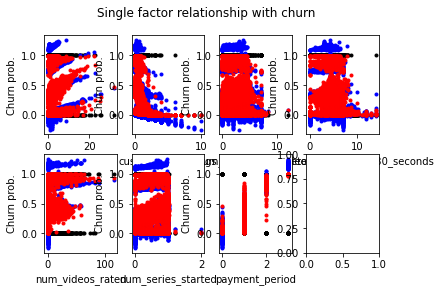

In [186]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

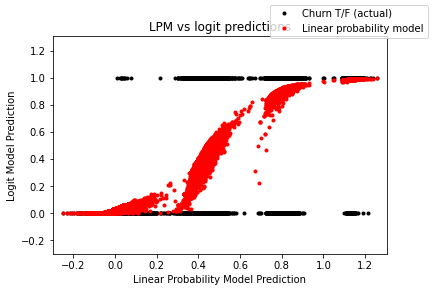

In [187]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [188]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

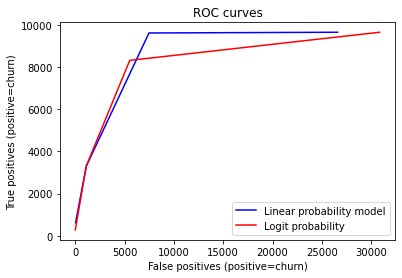

In [189]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [190]:
#1

In [191]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.9
threshold = 0.8
base_price = 10
discount_amount = 0.5
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [192]:
np.random.seed(0)
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [193]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [194]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,30842,308420,0.0
lpm_offer,32275,313740,0.017249
logit_offer,33762,317465,0.029327


In [195]:
#2

In [196]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [197]:
df_lift_threshold[(df_lift_threshold['logit_offer'] == max(df_lift_threshold['logit_offer']))]

,threshold,no_offer,lpm_offer,logit_offer
40,0.4,0.0,0.033104,0.038308


In [198]:
df_test_2, df_impact_2 = apply_offers(df_test, 0.61, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [199]:
df_impact_2

,subs,revenue,lift_from_no_offer
no_offer,30842,308420,0.0
lpm_offer,33813,317635,0.029878
logit_offer,33853,317745,0.030235


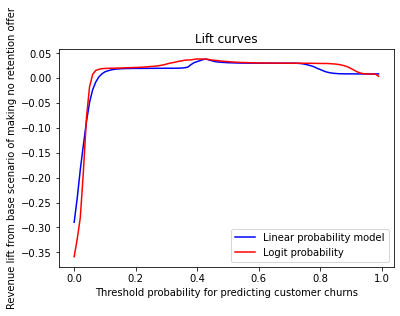

In [200]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [201]:
#3

In [202]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100

    _, t_df_impact = apply_offers(df_test, 0.61, base_price, t_discount_amount, cases, t_discount_amount, acceptance_rate_nonchurn )

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [203]:
df_lift_discount_amount[(df_lift_discount_amount['logit_offer'] == max(df_lift_discount_amount['logit_offer']))]

,discount_amount,no_offer,lpm_offer,logit_offer
31,0.31,0.0,0.011996,0.012017


In [204]:
df_test_3, df_impact_3 = apply_offers(df_test, 0.61, base_price, 0.34, cases, 0.34, acceptance_rate_nonchurn)

In [205]:
df_impact_3

,subs,revenue,lift_from_no_offer
no_offer,30842,308420,0.0
lpm_offer,31978,312082.4,0.011875
logit_offer,31989,312093.8,0.011912


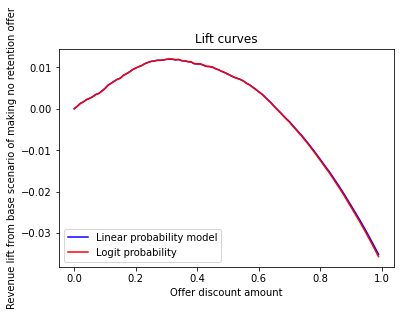

In [206]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [207]:
#4

In [147]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount = t_ind/100
    _, t_df_impact = apply_offers(df_test, 0.61, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

In [148]:
df_lift_acceptance_rate_churn[(df_lift_acceptance_rate_churn['logit_offer'] == max(df_lift_acceptance_rate_churn['logit_offer']))]

,acceptance_rate_churn,no_offer,lpm_offer,logit_offer
31,0.31,0.0,0.011996,0.012011


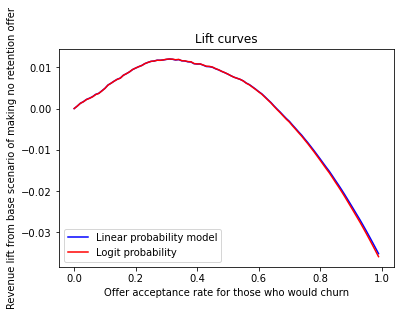

In [149]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])